In [1]:
from sqlalchemy import create_engine
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def hist_plot (DataFrame):
    for col in DataFrame:
        DataFrame[col].hist()
        plt.title(col)
        plt.figure()

In [3]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

1. Get the numerical variables from our dataset.

In [4]:
numericals = customer_df.select_dtypes(np.number)


2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


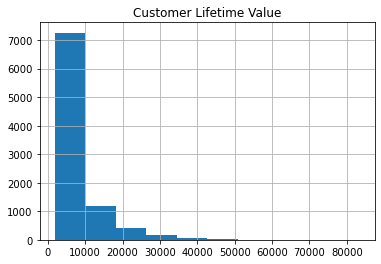

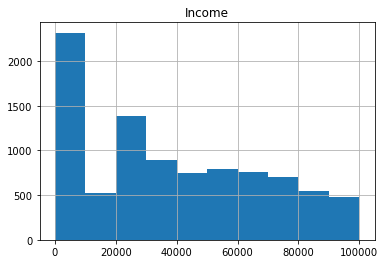

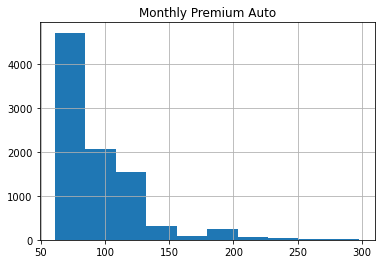

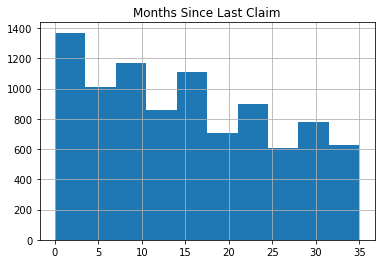

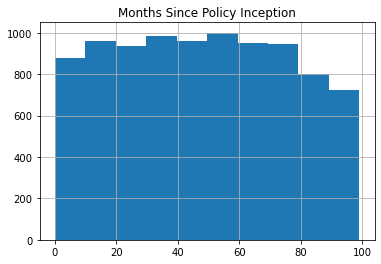

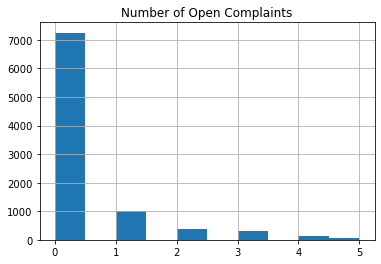

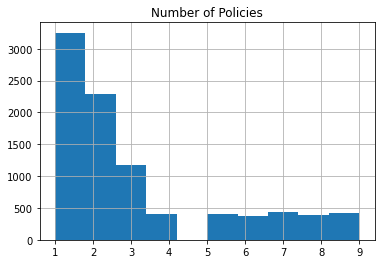

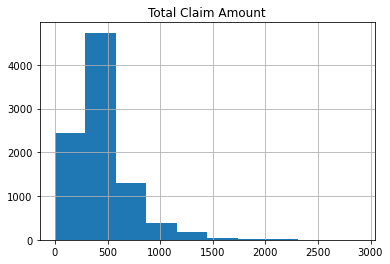

<Figure size 432x288 with 0 Axes>

In [5]:
hist_plot(numericals)


3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [7]:
#Normalize (numerical).
def no_minmax(dataframe):
    transformer = MinMaxScaler().fit(dataframe) ### THIS IS THE ONE FOR NORMALIZING
    x_minmax = transformer.transform(dataframe)
    return(pd.DataFrame(x_minmax, index=dataframe.index, columns=dataframe.columns))

In [8]:
#Normalize (numerical).
def no_std(dataframe):
    transformer = StandardScaler().fit(dataframe) ### THIS IS THE ONE FOR NORMALIZING
    x_minmax = transformer.transform(dataframe)
    return(pd.DataFrame(x_minmax, index=dataframe.index, columns=dataframe.columns))

In [9]:
minmax = no_minmax(numericals)

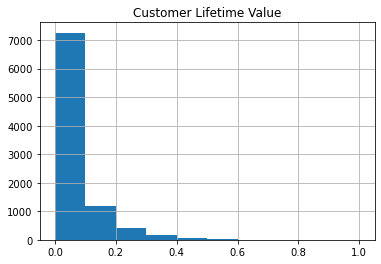

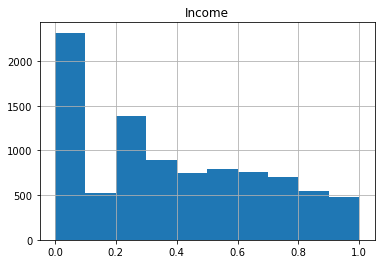

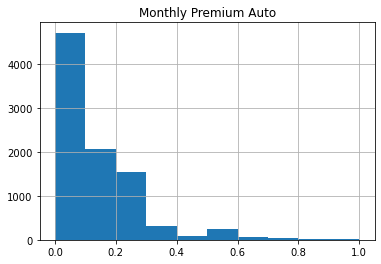

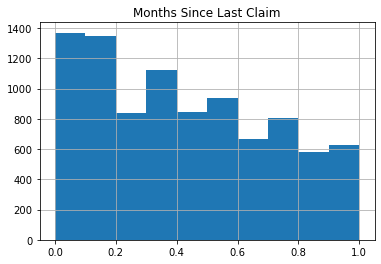

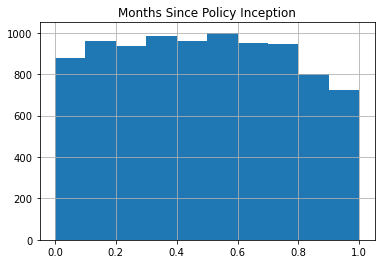

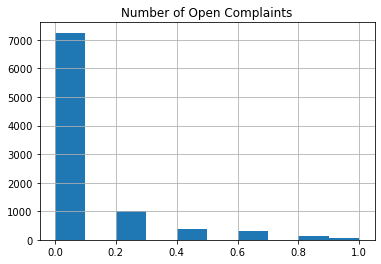

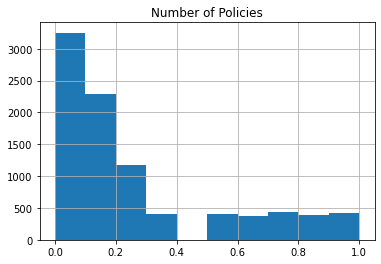

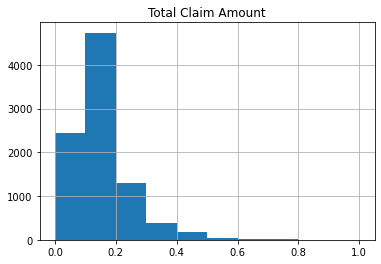

<Figure size 432x288 with 0 Axes>

In [10]:
hist_plot(minmax)

In [11]:
stdrd = no_std(numericals)

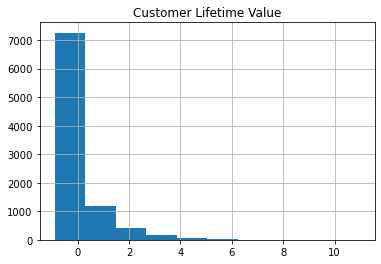

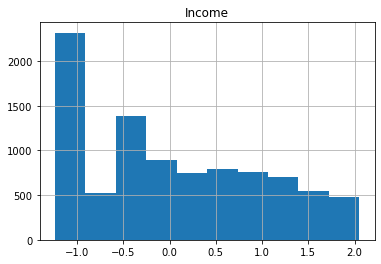

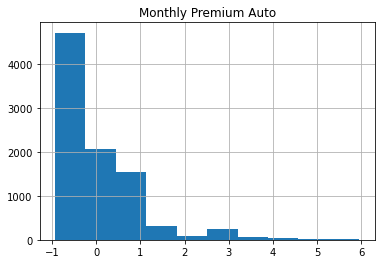

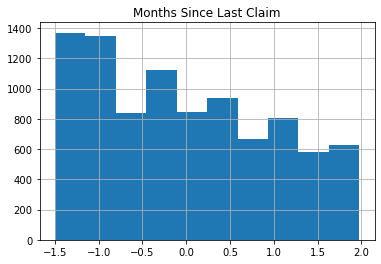

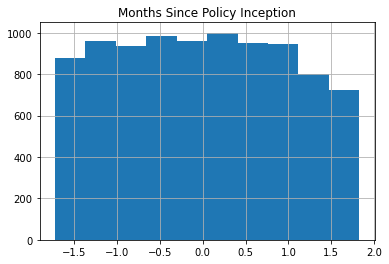

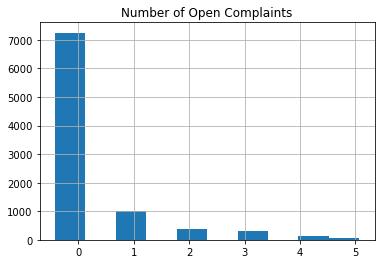

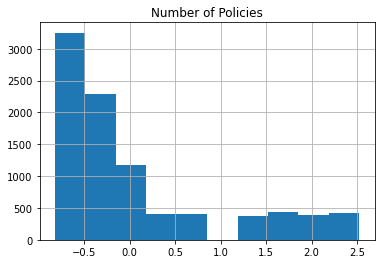

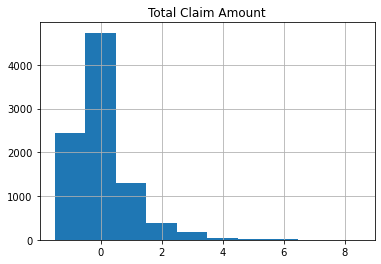

<Figure size 432x288 with 0 Axes>

In [12]:
hist_plot(stdrd)

In [13]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [18]:
logtr = pd.DataFrame()
for col in numericals.columns:
    logtr[col] =  pd.Series(map(log_transfom_clean_, numericals[col]))


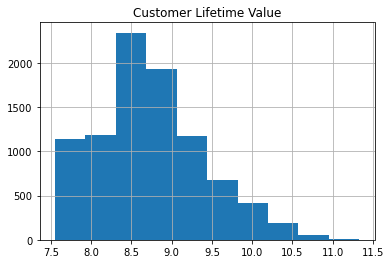

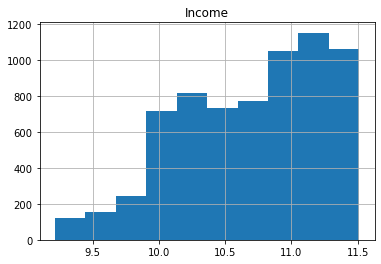

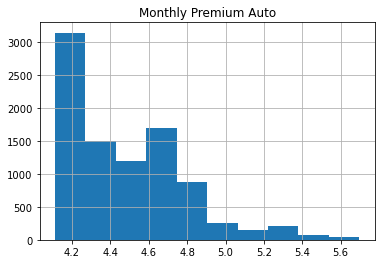

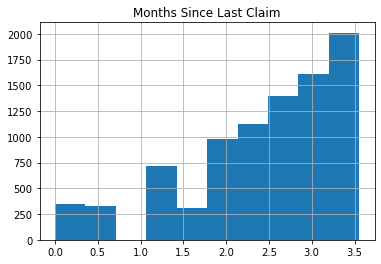

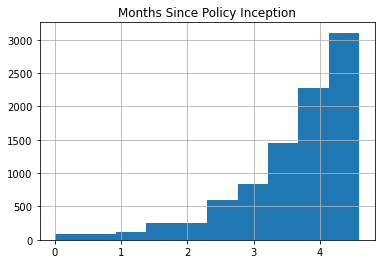

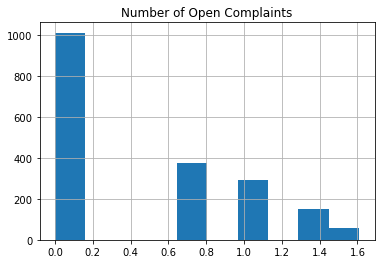

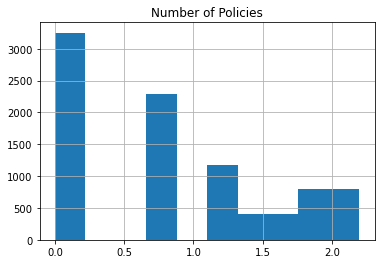

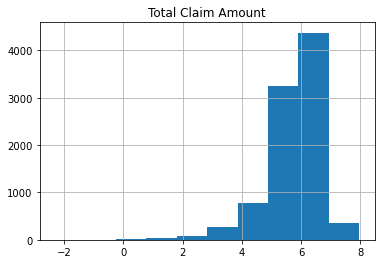

<Figure size 432x288 with 0 Axes>

In [20]:
hist_plot(logtr)

In [21]:
sqrttr = pd.DataFrame()
for col in numericals.columns:
    sqrttr[col] =  pd.Series(map(sqrt_transfom_clean_, numericals[col]))


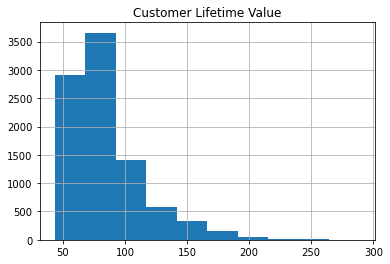

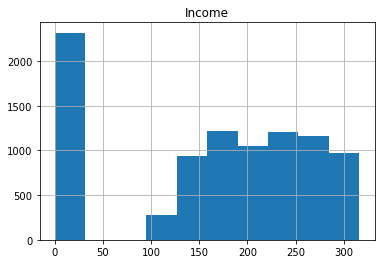

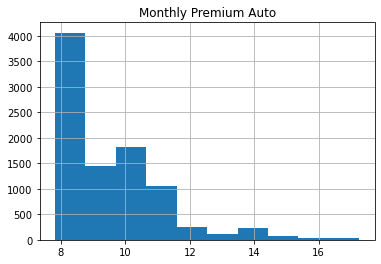

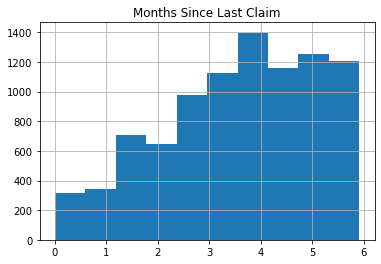

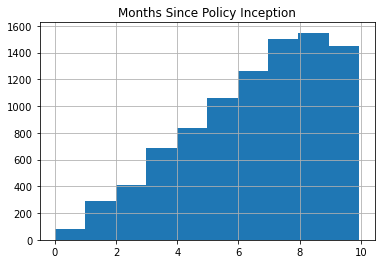

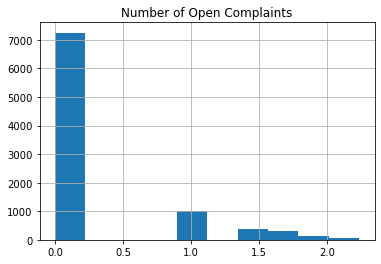

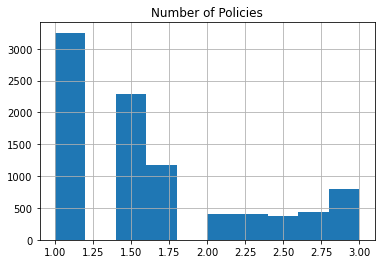

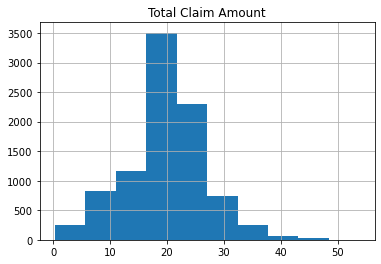

<Figure size 432x288 with 0 Axes>

In [22]:
hist_plot(sqrttr)

Logarithmic and square root transformations chage the result